<a href="https://colab.research.google.com/github/Allen123321/DEMO-DL/blob/master/Adaboost_classification_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib as mpl 

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_gaussian_quantiles


In [ ]:
# 设置属性防止中文乱码
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

In [19]:
#创建数据
X1,y1 = make_gaussian_quantiles(cov=2.,
                                n_samples=200,n_features =2,
                                n_classes=2,random_state=1)   # 创建符合高斯分布的数据集

X2,y2 = make_gaussian_quantiles(mean=(3,3),cov=1.5,
                                n_samples=300,n_features=2,
                                n_classes=2,random_state=1)


In [21]:
X = np.concatenate((X1,X2))
y = np.concatenate((y1,-y2 + 1))
#构建adaboost模型
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth= 1),
                         algorithm='SAMME.R',
                         n_estimators=200) 

bdt.fit(X,y)
plot_step = 0.02
x_min,x_max = X[:,0].min() -1, X[:,0].max()+1
y_min,y_max = X[:,1].min() -1, X[:,0].max()+1 
xx,yy=np.meshgrid(np.arange(x_min,x_max,plot_step),
                  np.arange(y_min,y_max,plot_step))

#预测
Z = bdt.predict(np.c_[xx.ravel(),yy.ravel()])

#设置维度
Z = Z.reshape(xx.shape)




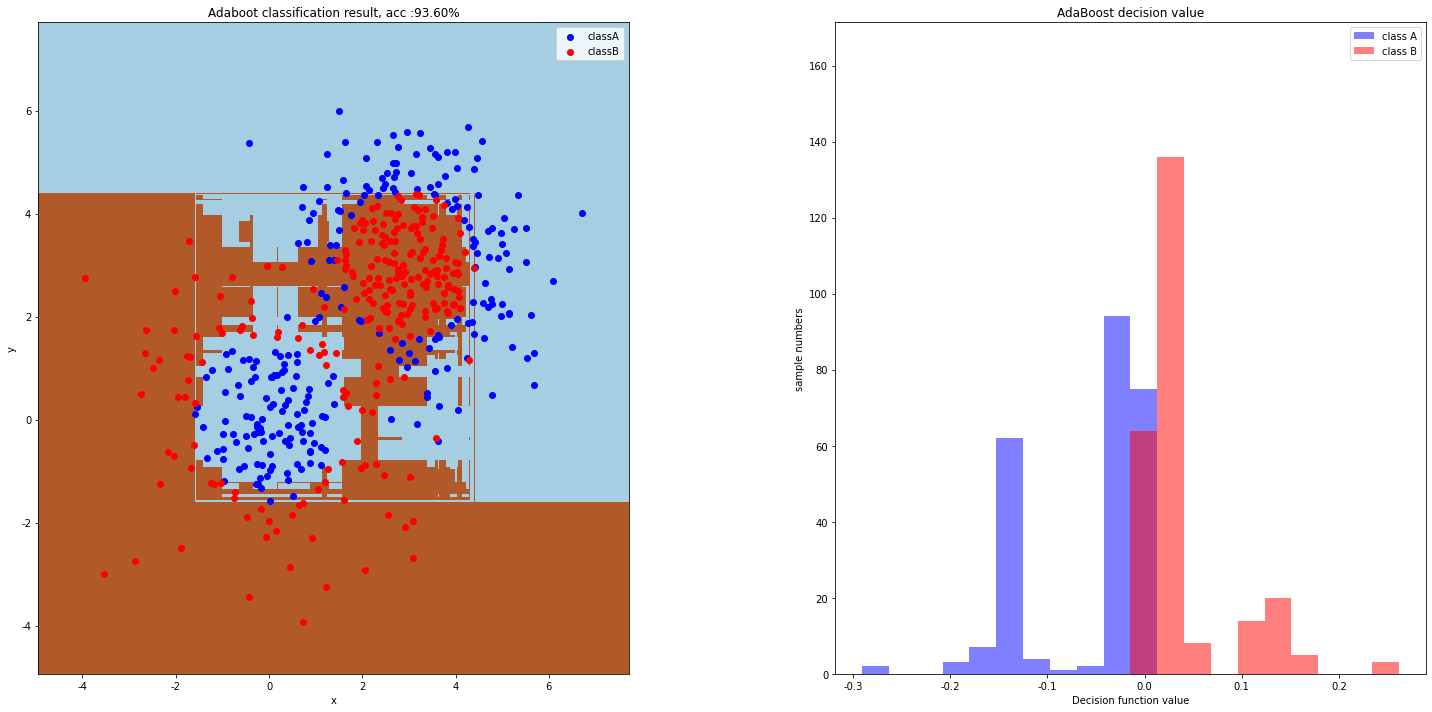

In [22]:
#画图
plot_colors = 'br'
class_names = 'AB'

plt.figure(figsize=(20,10),facecolor = 'w')

#局部子图
plt.subplot(121)
plt.pcolormesh(xx,yy,Z,cmap=plt.cm.Paired) #背景

for i,n,c in zip(range(2),class_names,plot_colors):
  idx = np.where(y==i)
  plt.scatter(X[idx,0],X[idx,1],
              c=c,cmap=plt.cm.Paired,
              label=u"class%s" %n)
  
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.title(u'Adaboot classification result, acc :%.2f%%'%(bdt.score(X,y)*100))

# 获取决策函数的数值
twoclass_output = bdt.decision_function(X)
#获取范围
plot_range = (twoclass_output.min(), twoclass_output.max())
plt.subplot(122)
for i, n, c in zip(range(2), class_names, plot_colors):
    # 直方图
    plt.hist(twoclass_output[y == i],
             bins=20,
             range=plot_range,
             facecolor=c,
             label=u'class %s' % n,
             alpha=.5)
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, y1, y2 * 1.2))
plt.legend(loc='upper right')
plt.ylabel(u'sample numbers')
plt.xlabel(u'Decision function value')
plt.title(u'AdaBoost decision value')

plt.tight_layout()
plt.subplots_adjust(wspace=0.35)
plt.show()   

